# Linear Regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df1 = pd.read_csv("C:\\Users\\ratak\\datascience\\Assignments\\3. Simple Linear Regression\\delivery_time.csv")
df1

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


C:\Users\ratak\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


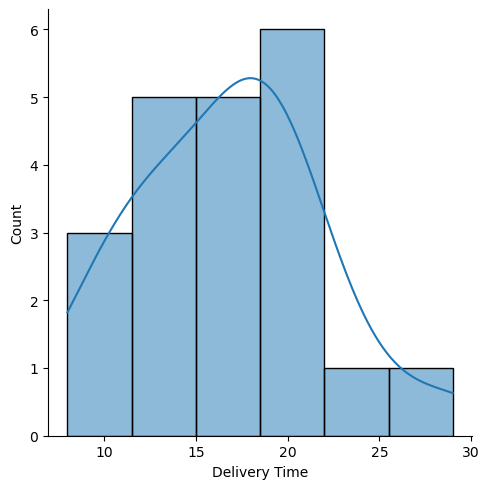

In [4]:
sns.displot(df1['Delivery Time'], kde = True)

C:\Users\ratak\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


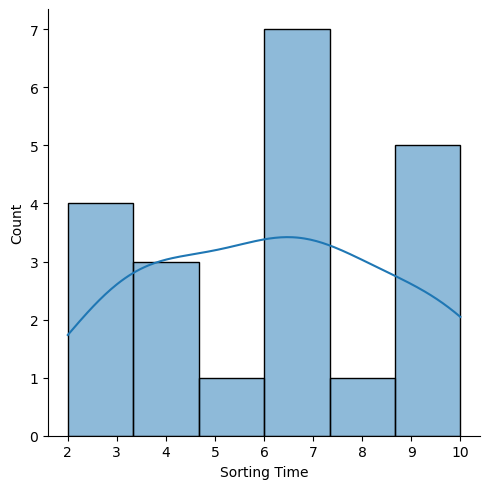

In [5]:
sns.displot(df1['Sorting Time'], kde = True)

In [6]:
df1 = df1.rename({'Delivery Time': 'delivery_time', 'Sorting Time': 'sorting_time'},axis=1)
df1

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [7]:
df1.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


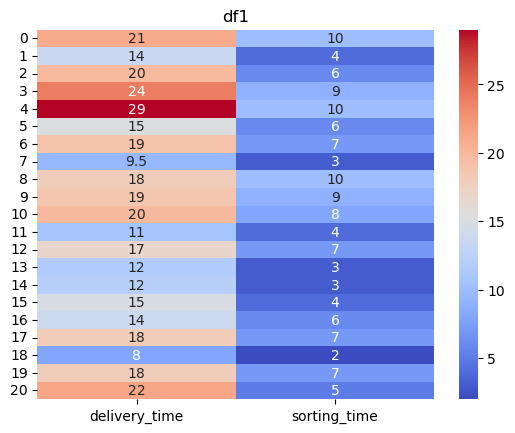

In [8]:
sns.heatmap(df1, annot=True, cmap='coolwarm')
plt.title('df1')
plt.show()

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

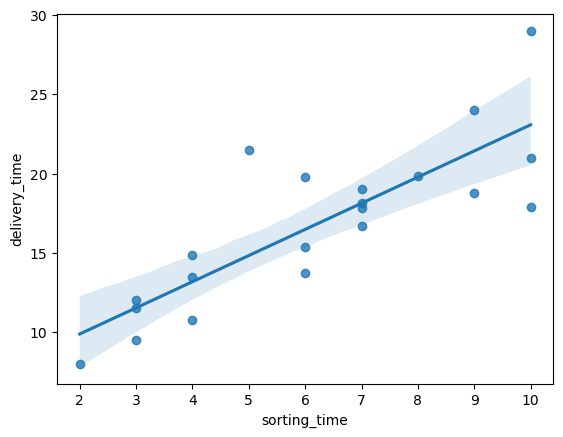

In [9]:
sns.regplot(x=df1['sorting_time'], y=df1['delivery_time'])

   # Scatter plot between sorting time and delivery time

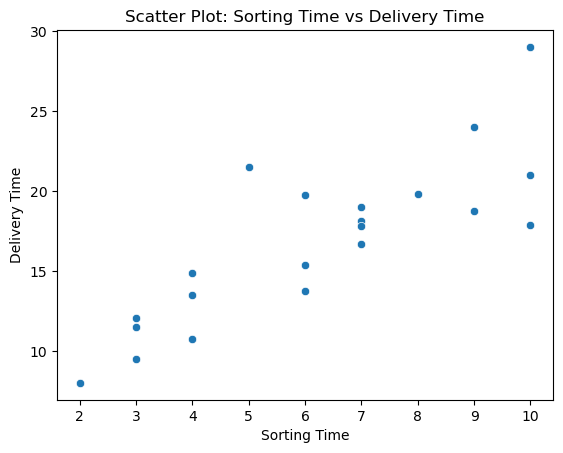

In [10]:
sns.scatterplot(x=df1['sorting_time'], y=df1['delivery_time'], data=df1)
plt.title('Scatter Plot: Sorting Time vs Delivery Time')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [11]:
# Creating Transformed values
df1['sorting_time_log'] = np.log(df1['sorting_time'])
df1['sorting_time_square'] = np.square(df1['sorting_time'])
df1['sorting_time_sqrt'] = np.sqrt(df1['sorting_time'])

In [12]:
X = df1[['sorting_time', 'sorting_time_log', 'sorting_time_square', 'sorting_time_sqrt']]
y = df1['delivery_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Function to build and evaluate linear regression model
def build_and_evaluate_model(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse

# Evaluate models with different transformations
rmse_results = {}
transformations = ['Original', 'Log', 'Square', 'Sqrt']
for i, transformation in enumerate(['sorting_time', 'sorting_time_log', 'sorting_time_square', 'sorting_time_sqrt']):
    X_train_transformed = X_train[[transformation]]
    X_test_transformed = X_test[[transformation]]
    rmse = build_and_evaluate_model(X_train_transformed, X_test_transformed, y_train, y_test)
    rmse_results[transformations[i]] = rmse

 # Display RMSE values
print("RMSE values:")
for transformation, rmse in rmse_results.items():
    print(f"{transformation}: {rmse}")


RMSE values:
Original: 3.7478979383962705
Log: 2.5276247210276277
Square: 4.776557534805919
Sqrt: 3.1403397617192867


# Model Building

In [14]:
df1 = smf.ols("delivery_time~sorting_time", data=df1). fit()

# Model Testing 

In [15]:
# Finding coefficient parameters
df1.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [16]:
# Finding tvalues and pvalues
df1.tvalues, df1.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [17]:
# Finding Rsquared Values
df1.rsquared , df1.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# Model Predictions


In [18]:
# Manual predicition for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [19]:
# Automatic Prediction for sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [20]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [21]:
df1.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

# Question 2

In [22]:
df2 = pd.read_csv("C:\\Users\\ratak\\datascience\\Assignments\\3. Simple Linear Regression\\Salary_Data.csv")
df2

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


EDA and Data Visulization

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


C:\Users\ratak\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


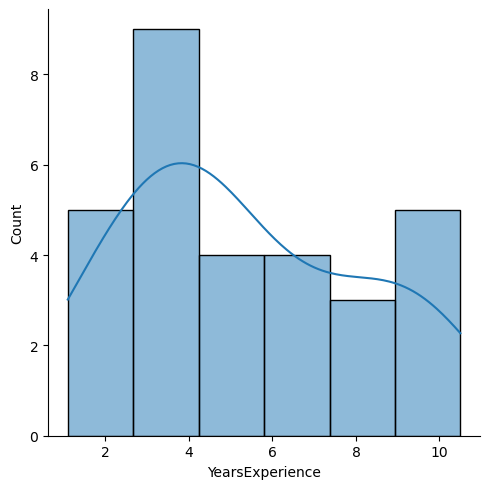

In [24]:
sns.displot(df2['YearsExperience'], kde = True)

C:\Users\ratak\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


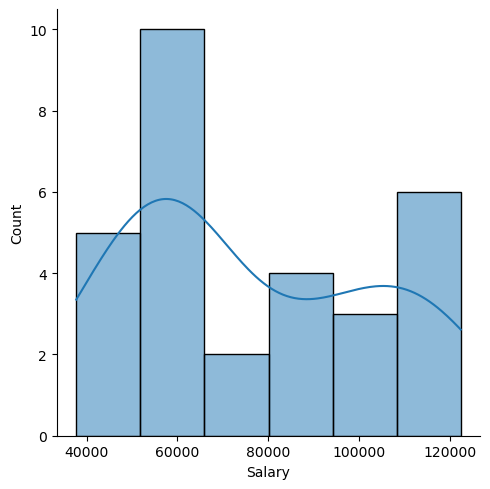

In [25]:
sns.displot(df2['Salary'], kde = True)

In [26]:
# Correlation Analysis

In [27]:
df2.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

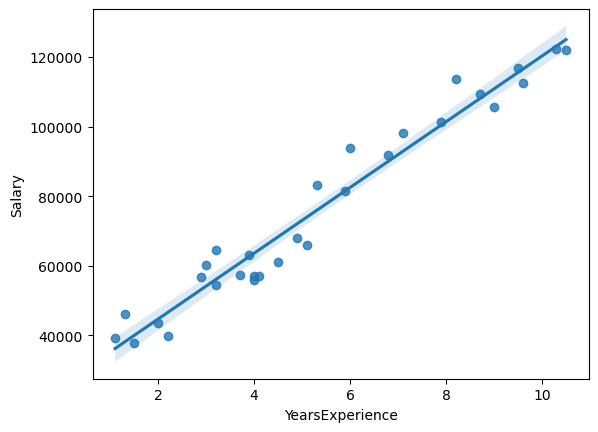

In [28]:
sns.regplot(x=df2['YearsExperience'], y=df2['Salary'])

In [29]:
# Model Building


In [30]:
model= smf.ols("Salary~YearsExperience", data=df2).fit()

In [31]:
# Model Testing

In [32]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [33]:
# Finding Pvalues and tvalues
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [34]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [35]:
# Model Predictions

In [36]:
# Manual prediction for say 3 years experience
Salary = (25792.200199)+(9449.962321)*(3)
Salary

54142.087162

In [37]:
# Automatic Prediction for say 3 & 5 Years Experience

In [38]:
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [39]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [40]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64

In [49]:
print(X_train.columns)

Index(['YearsExperience', 'Salary'], dtype='object')


In [51]:
print(X_test.columns)

Index(['YearsExperience', 'Salary'], dtype='object')


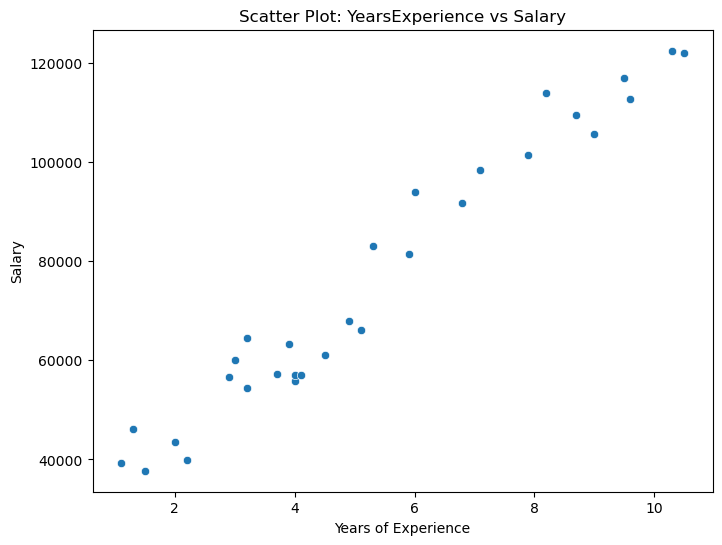

In [46]:
# Scatter plot between YearsExperience and Salary
plt.figure(figsize=(8, 6))
sns.scatterplot(x='YearsExperience', y='Salary', data=df2)
plt.title('Scatter Plot: YearsExperience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [42]:
# Creating transformed features
df2['Salary_log'] = np.log(df2['Salary'])
df2['Salary_square'] = np.square(df2['Salary'])
df2['Salary_sqrt'] = np.sqrt(df2['Salary'])

In [43]:
X = df2[['YearsExperience', 'Salary']]  # Replace ... with actual feature names
y = df2['Salary']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Function to build and evaluate linear regression model
def build_and_evaluate_model(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse

# Evaluate models with different transformations
rmse_results = {}
transformations = ['Original', 'Log', 'Square', 'Sqrt']
for i, transformation in enumerate(['Salary', 'Salary_log', 'Salary_square', 'Salary_sqrt']):
    X_train_transformed = X_train[['Salary', 'YearsExperience']]
    X_test_transformed = X_test[['Salary', 'YearsExperience']]
    rmse = build_and_evaluate_model(X_train_transformed, X_test_transformed, y_train, y_test)
    rmse_results[transformations[i]] = rmse

# Display RMSE values
print("RMSE values:")
for transformation, rmse in rmse_results.items():
    print(f"{transformation}: {rmse}")

RMSE values:
Original: 9.39322088914782e-12
Log: 9.39322088914782e-12
Square: 9.39322088914782e-12
Sqrt: 9.39322088914782e-12
